In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import cv2
import os
import glob
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import csv
import PIL
from PIL import Image
import json
import random
from sklearn import manifold
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.utils.validation import check_symmetric
import math

In [ ]:
#!pip install geopandas

In [ ]:
'''
import geopandas as gpd
import pandas as pd

# Access built-in Natural Earth data via GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print(type(world))
# Get a list (dataframe) of country centroids
centroids = world.centroid
data = {
    'country':world.name,
    'centroids':centroids
}

centroid_list = pd.concat([world.name, centroids], axis=1)



# Plot the results
base = world.plot(column = 'name', cmap = 'Blues')
centroids.plot(ax = base, marker = 'o', color = 'red', markersize = 5)
'''

In [3]:
#airports data
data = pd.read_csv('/content/drive/MyDrive/dataPCA.csv', sep=';')
#countries data
data2 = pd.read_csv('/content/drive/MyDrive/dataPCA_countries2.csv', sep=';')
data2.head(20)

,Country,Destination_Countries,Airlines,Tot_Flights
0,United Arab Emirates,92,111,1494
1,Afghanistan,9,11,84
2,Antigua and Barbuda,16,15,69
3,Anguilla,4,5,12
4,Albania,7,13,72
5,Armenia,13,26,92
6,Netherlands Antilles,25,30,200
7,Angola,20,19,155
8,Argentina,22,30,511
9,American Samoa,1,1,2


**PCA for airports**

In [ ]:
info = []
for i in range(len(data)):
  row = data.iloc[i]
  airportId = row['AirportID']
  #destination_Airports = row['Destination_Airports']
  if(row['Destination_Airports'] == "\\N"): 
    destination_Airports = 0
  else:
    destination_Airports = len(np.array(row['Destination_Airports'].split(','), 'float32'))
  airlines = len(np.array(row['Airlines'].split(','), 'float32'))
  tot_flights = row['Tot_Flights']
  dictionary = {'AirportID':airportId, 
               'Destination_Airports':destination_Airports,
               'Airlines':airlines,
               'Tot_Flights':tot_flights
               }
  info.append(dictionary)
#print(info)

def dim_red_computation (dictionary, dim_reduction_alg='PCA'):
    standard_input_list = []
    nodes_id = []

    for node in dictionary:
        nodes_id.append(node['AirportID'])
        node_values = []
        node_values.append(node['Destination_Airports'])
        node_values.append(node['Airlines'])
        node_values.append(node['Tot_Flights'])

        standard_input_list.append(node_values)

    #data standardization
    std_scale = preprocessing.StandardScaler().fit(standard_input_list)
    standard_input_list= std_scale.transform(standard_input_list)

    # MDS based on Euclidean distance
    if (dim_reduction_alg == 'mds'):
        mds = manifold.MDS(n_components=2, dissimilarity="euclidean",random_state=13)
        pos = mds.fit(standard_input_list).embedding_
    # PCA 
    elif (dim_reduction_alg == 'pca'):
        pca = PCA(n_components=2)
        pos = pca.fit_transform(standard_input_list)


    return nodes_id,pos,standard_input_list
def plot_dim_red(nodes_id, pos):
    # Scatter plot without labels
    plt.scatter(pos[:, 0], pos[:, 1], color='red',s=10, lw=0, label='Airports ')
    plt.legend(scatterpoints=1, loc='best', shadow=False)
    plt.show()

    # Scatter plot with labels: each label is the identifier of the cryptocurrency
    for label, x, y in zip(nodes_id[:], pos[:, 0], pos[:, 1]):

        plt.annotate(
            label,
            xy = (x, y), xytext = (7, -5),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.1', fc = 'red', alpha = 0.5))
    plt.show()
  
dim_reduction_alg = 'pca'
nodes_id, pos, standard_input_list = dim_red_computation(info, dim_reduction_alg=dim_reduction_alg)
print(info)
print('-----------------')
print(nodes_id)
print('----------------')
print(pos)
print('----------------')
print(standard_input_list)

#plot_dim_red(nodes_id, pos)
j = 0
pca_dict = []
for i in range(len(nodes_id)):
    
    pca_res = {}
    pos_dict = []
    airpId = str(nodes_id[i])
    x = pos[i][0]
    y = pos[i][1]
    pos_dict = [x,y]
    pca_res = {"Airport_ID": airpId, "PCA_pos": pos_dict}
    pca_dict.append(pca_res)

#print(pca_dict)
#with open('/content/drive/MyDrive/pca_positions.json', 'w') as f:
#    json.dump(pca_dict,f)
plot_dim_red(nodes_id, pos) 


**PCA for countries**

[{'Country': 'United Arab Emirates', 'Destination_Countries': 92, 'Airlines': 111, 'Tot_Flights': 1494}, {'Country': 'Afghanistan', 'Destination_Countries': 9, 'Airlines': 11, 'Tot_Flights': 84}, {'Country': 'Antigua and Barbuda', 'Destination_Countries': 16, 'Airlines': 15, 'Tot_Flights': 69}, {'Country': 'Anguilla', 'Destination_Countries': 4, 'Airlines': 5, 'Tot_Flights': 12}, {'Country': 'Albania', 'Destination_Countries': 7, 'Airlines': 13, 'Tot_Flights': 72}, {'Country': 'Armenia', 'Destination_Countries': 13, 'Airlines': 26, 'Tot_Flights': 92}, {'Country': 'Netherlands Antilles', 'Destination_Countries': 25, 'Airlines': 30, 'Tot_Flights': 200}, {'Country': 'Angola', 'Destination_Countries': 20, 'Airlines': 19, 'Tot_Flights': 155}, {'Country': 'Argentina', 'Destination_Countries': 22, 'Airlines': 30, 'Tot_Flights': 511}, {'Country': 'American Samoa', 'Destination_Countries': 1, 'Airlines': 1, 'Tot_Flights': 2}, {'Country': 'Austria', 'Destination_Countries': 59, 'Airlines': 72, '

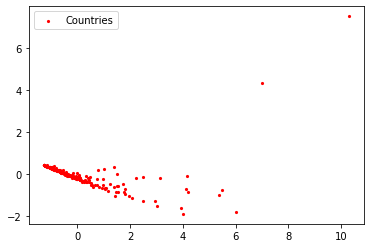

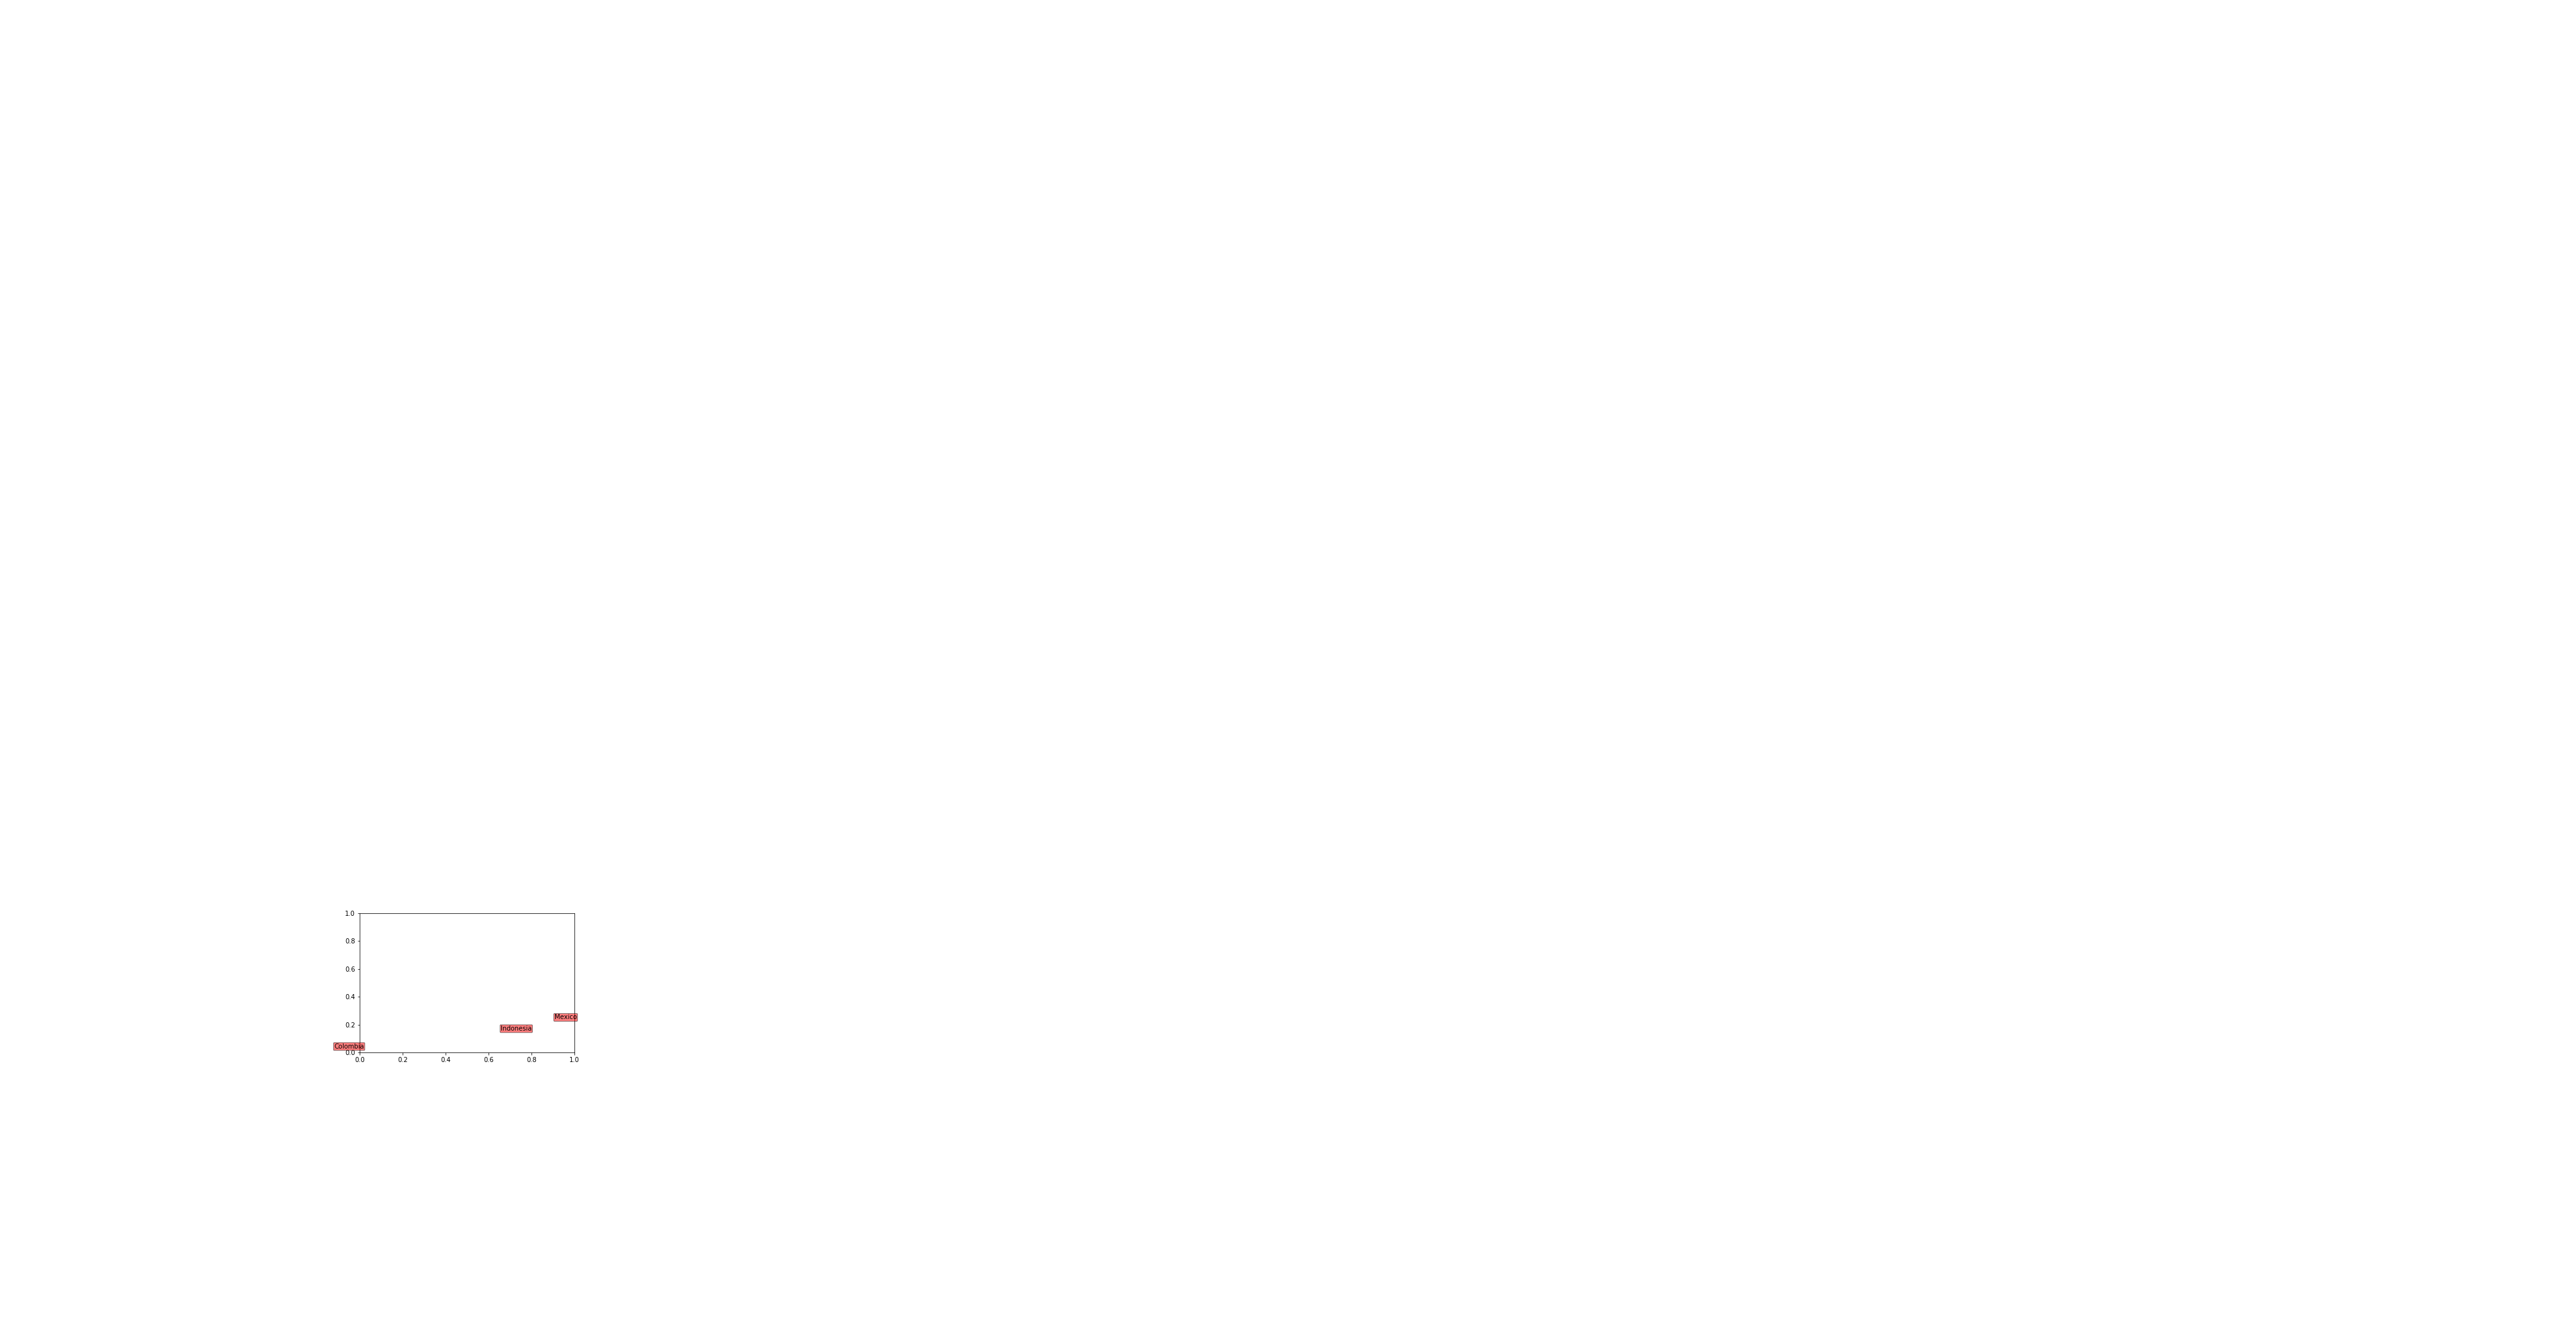

In [6]:
info = []
for i in range(len(data2)):
  row = data2.iloc[i]
  country = row['Country']
  #destination_Airports = row['Destination_Airports']
  destination_countries = row['Destination_Countries']
  airlines = row['Airlines']
  tot_flights = row['Tot_Flights']
  dictionary = {'Country':country, 
               'Destination_Countries':destination_countries,
               'Airlines':airlines,
               'Tot_Flights':tot_flights
               }
  info.append(dictionary)
print(info)

def dim_red_computation (dictionary, dim_reduction_alg='PCA'):
    standard_input_list = []
    nodes_id = []

    for node in dictionary:
        nodes_id.append(node['Country'])
        node_values = []
        node_values.append(node['Destination_Countries'])
        node_values.append(node['Airlines'])
        node_values.append(node['Tot_Flights'])

        standard_input_list.append(node_values)

    #data standardization
    std_scale = preprocessing.StandardScaler().fit(standard_input_list)
    standard_input_list= std_scale.transform(standard_input_list)

    # MDS based on Euclidean distance
    if (dim_reduction_alg == 'mds'):
        mds = manifold.MDS(n_components=2, dissimilarity="euclidean",random_state=13)
        pos = mds.fit(standard_input_list).embedding_
    # PCA 
    elif (dim_reduction_alg == 'pca'):
        pca = PCA(n_components=2)
        pos = pca.fit_transform(standard_input_list)


    return nodes_id,pos,standard_input_list
def plot_dim_red(nodes_id, pos):
    # Scatter plot without labels
    plt.scatter(pos[:, 0], pos[:, 1], color='red',s=10, lw=0, label='Countries')
    plt.legend(scatterpoints=1, loc='best', shadow=False)
    plt.show()

    # Scatter plot with labels: each label is the identifier of the cryptocurrency
    for label, x, y in zip(nodes_id[:], pos[:, 0], pos[:, 1]):

        plt.annotate(
            label,
            xy = (x, y), xytext = (7, -5),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.1', fc = 'red', alpha = 0.5))
    plt.show()
  
dim_reduction_alg = 'pca'
nodes_id, pos, standard_input_list = dim_red_computation(info, dim_reduction_alg=dim_reduction_alg)
print(info)
print('-----------------')
print(nodes_id)
print('----------------')
print(pos)
print('----------------')
print(standard_input_list)

#plot_dim_red(nodes_id, pos)
j = 0
pca_dict = []
for i in range(len(nodes_id)):
    
    pca_res = {}
    pos_dict = []
    country = str(nodes_id[i])
    print(country)
    x = pos[i][0]
    y = pos[i][1]
    pos_dict = [x,y]
    pca_res = {"Country": country, "PCA_pos": pos_dict}
    pca_dict.append(pca_res)

#print(pca_dict)
with open('/content/drive/MyDrive/pca_countries2_pos.json', 'w') as f:
    json.dump(pca_dict,f)
plot_dim_red(nodes_id, pos) 